In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# set jupyter's max row display
pd.set_option('display.max_row', 1000)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

In [9]:
df = pd.read_excel('egressos_uva.xlsx')
df.head()

,ALUNO,EMAIL,NATURALIDADE,ENDEREÇO,IDADE,GÊNERO,CURSO,GRAU,DATA INGRESSO,DATA EGRESSO,RENDA SALARIAL,COR,CONCLUIU EM ESCOLA PÚBLICA,ESCOLARIDADE DO RESPONSÁVEL PELA FAMÍLIA,TIPO DE TRANSPORTE PARA A UVA,QTD. DE LIVROS LIDOS APÓS INGRESSO,RESIDÊNCIA,Coluna1
0,ANA MESQUITA PAIVA,aninha-mp1@hotmail.com,SOBRAL,"FAZENDA PAU DARCO, Nº. S/N. Compl.: 4, IRAJA. ...",20 ANOS,FEMININO,GEOGRAFIA,LICENCIATURA,10/01/2013,07/02/2018,2 SALÁRIO-MÍNIMO(S),PARDA,SIM,5 A 8 SERIE INCOMPLETO,CARONA,3,HIDROLANDIA,NaN
1,JOAO VITOR ALBUQUERQUE CAVALCANTE DE CARVALHO,jvitoralbuquerque@gmail.com,FORTALEZA,"RUA JARDEL LOPES ROCHA, Nº. 41. Compl.: CASA 2...",21 ANOS,MASCULINO,DIREITO,BACHARELADO,29/07/2013,28/03/2018,8+ SALÁRIO-MÍNIMO(S),BRANCA,SIM,POS-GRADUACAO,CARRO MOTOCICLETA PAIS,6,SOBRAL,NaN
2,SILAS BENEDITO MARQUES RODRIGUES,silas_benedito@hotmail.com,IBIAPINA,"DISTRITO DE OLINDA, Nº. SN. Compl.: NULL, DIST...",21 ANOS,MASCULINO,CIÊNCIAS CONTÁBEIS,BACHARELADO,28/07/2011,10/02/2017,4 SALÁRIO-MÍNIMO(S),BRANCA,NÃO,2 GRAU COMPLETO,CARRO MOTOCICLETA PROPRIOS,3,TIANGUA,NaN
3,SULAMARA XIMENES DE AGUIAR,sula_mara96@hotmail.com,SOBRAL,"RUA SANTA CLARA, Nº. 12. Compl.: CONJUNTO SANT...",21 ANOS,FEMININO,CIÊNCIAS CONTÁBEIS,BACHARELADO,17/01/2012,30/03/2016,2 SALÁRIO-MÍNIMO(S),PARDA,SIM,ATE 4 SERIE,COLETIVO,1,SOBRAL,NaN
4,VENANCIA ANTONIA NUNES AZEVEDO,venancianunes@gmail.com,IPU,"AV JOSE CARVALHO DE ARAGAO, Nº. 361. Compl.: P...",21 ANOS,FEMININO,CIÊNCIAS BIOLÓGICAS,BACHARELADO,16/07/2013,06/02/2018,2 SALÁRIO-MÍNIMO(S),PARDA,SIM,5 A 8 SERIE INCOMPLETO,COLETIVO,5,IPU,NaN


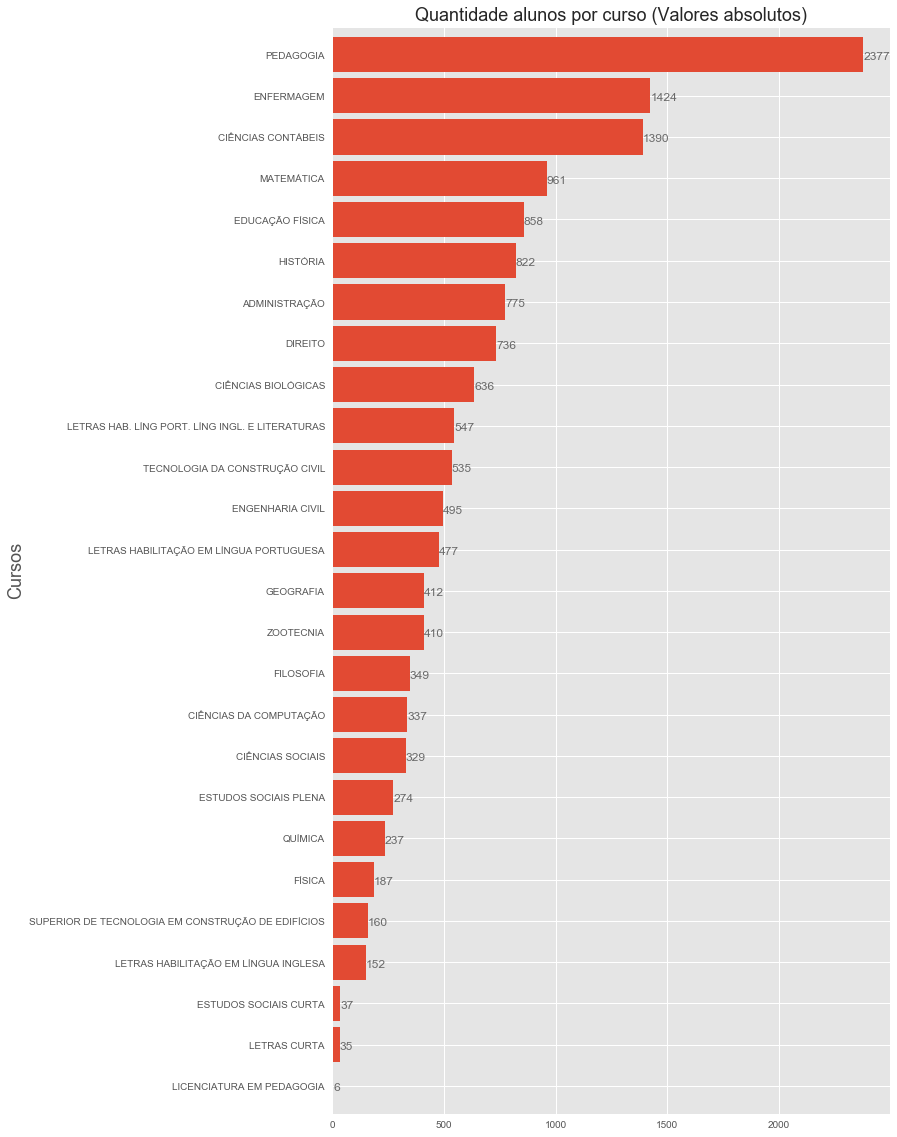

In [10]:
ax = df['CURSO'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 20), width=0.85, fontsize=10)

ax.set_title('Quantidade alunos por curso (Valores absolutos)', fontsize=18)
ax.set_ylabel('Cursos', fontsize=18)

total = df['CURSO'].count()

for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.31, str(i.get_width()), fontsize=12, color='dimgrey')

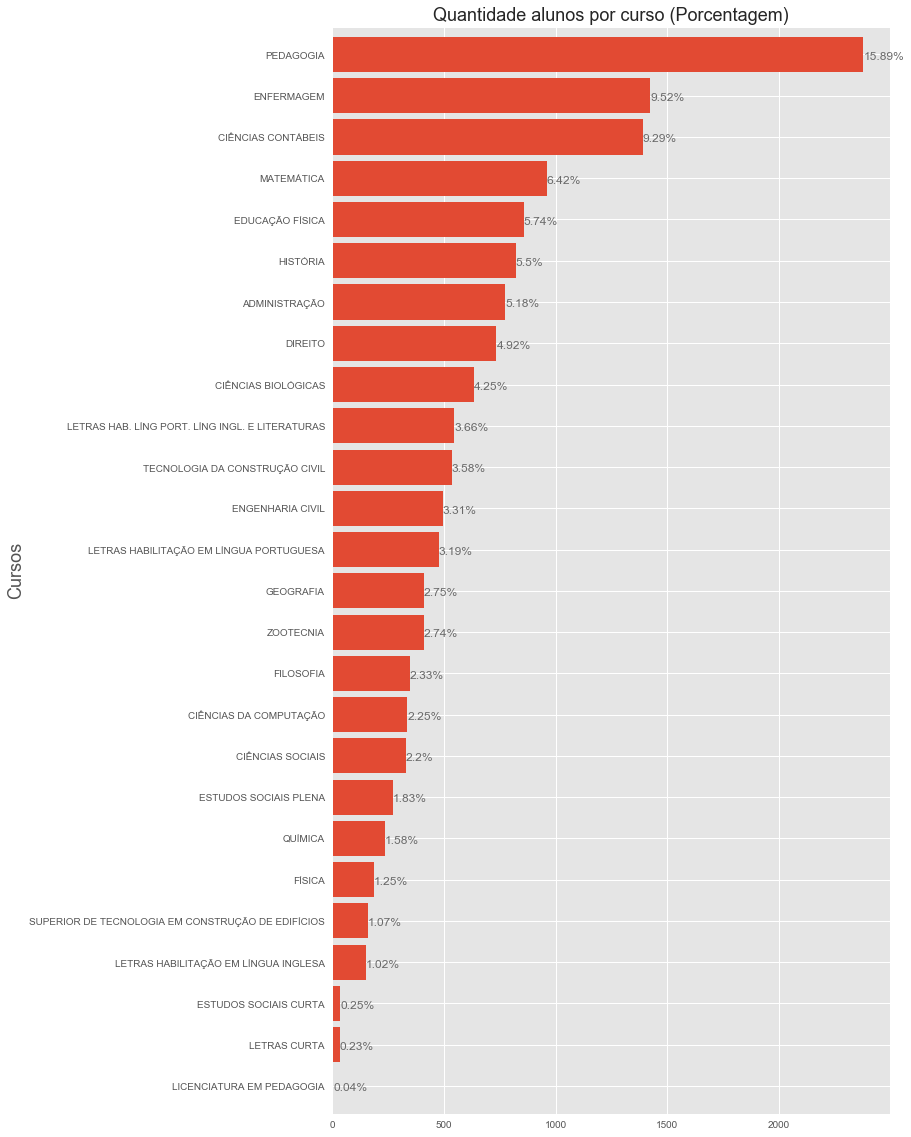

In [11]:
ax = df['CURSO'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 20), width=0.85, fontsize=10)

ax.set_title('Quantidade alunos por curso (Porcentagem)', fontsize=18)
ax.set_ylabel('Cursos', fontsize=18)

total = df['CURSO'].count()

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()/total)*100, 2))+ '%', fontsize=12, color='dimgrey')

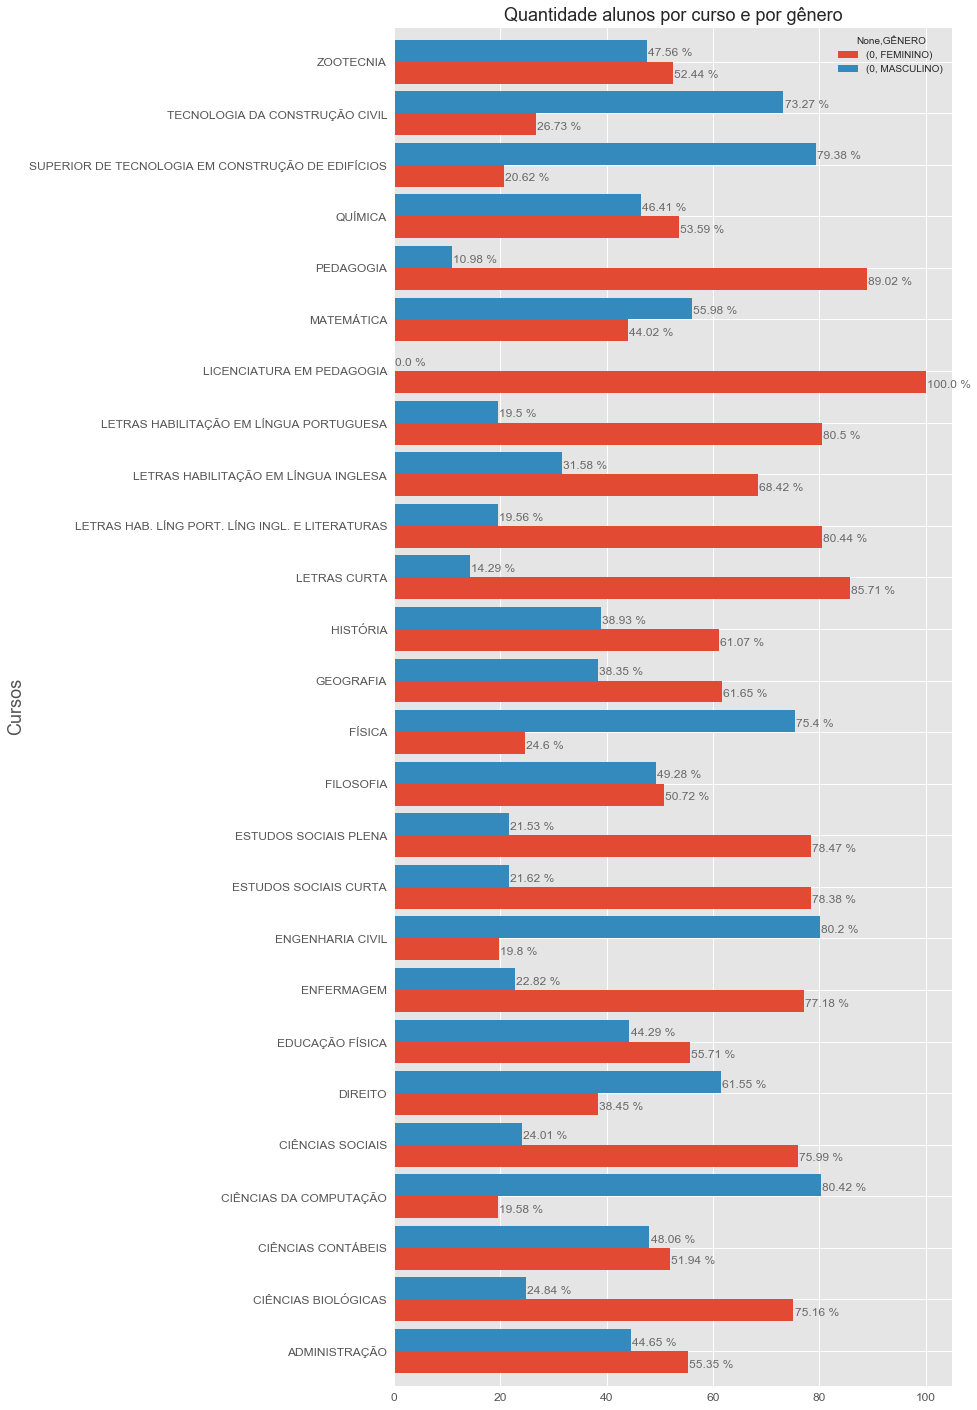

In [12]:
ax = df.groupby(['CURSO','GÊNERO']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='barh', figsize=(10, 25), width=0.85, fontsize=12)

ax.set_title('Quantidade alunos por curso e por gênero', fontsize=18)
ax.set_ylabel('Cursos', fontsize=18)

total = df['CURSO'].count()

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.2, i.get_y()+.11, str(round(i.get_width(), 2)) + ' %', fontsize=12, color='dimgrey')

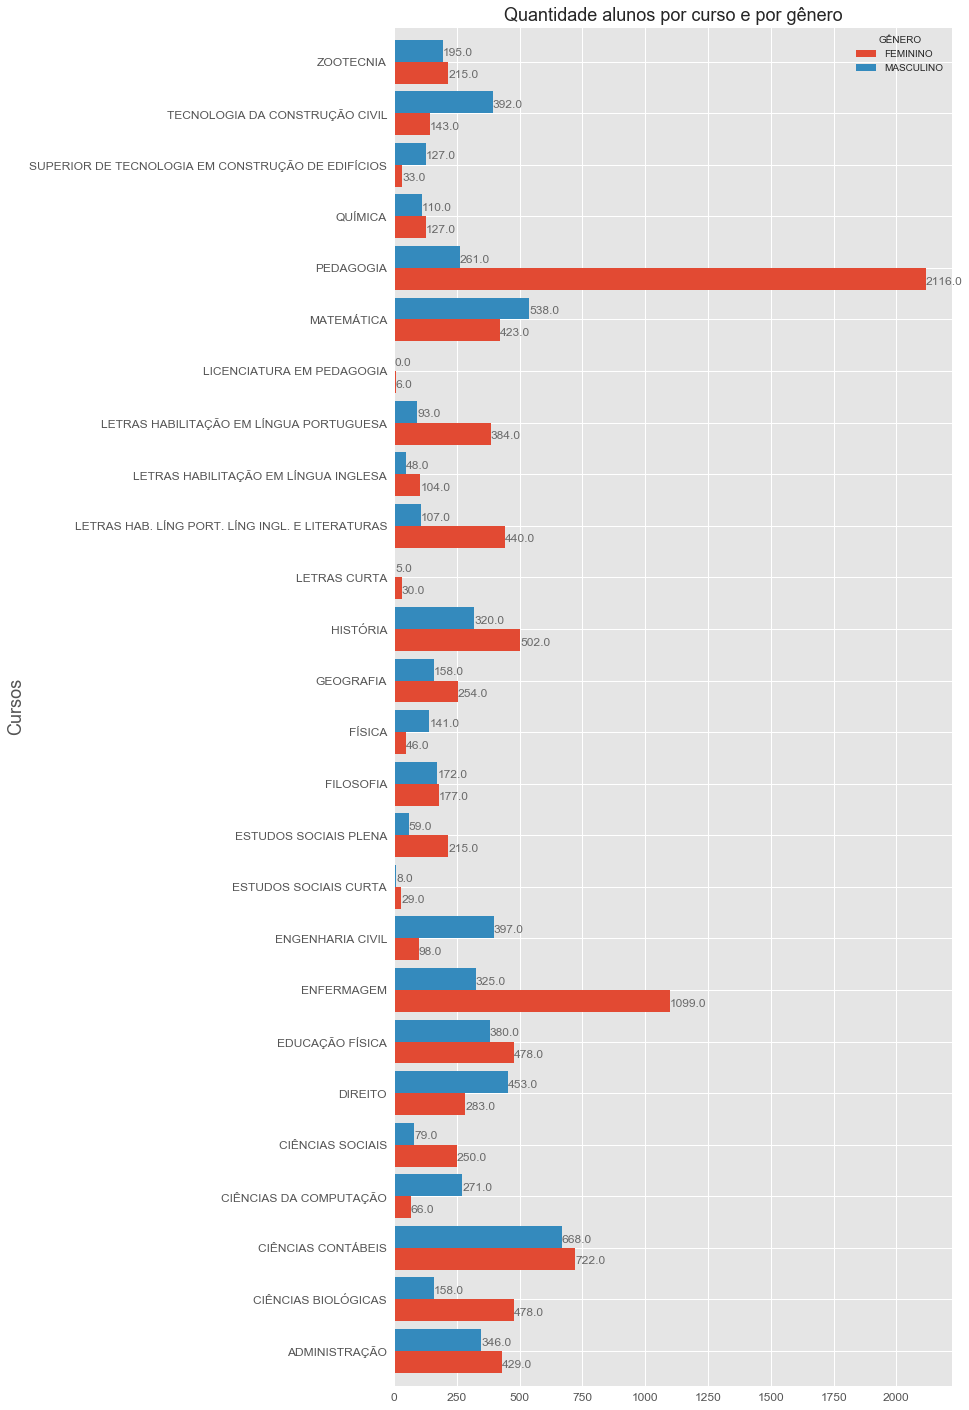

In [13]:
ax = df.groupby(['CURSO','GÊNERO']).size().unstack().plot(kind='barh', figsize=(10, 25), width=0.85, fontsize=12)

ax.set_title('Quantidade alunos por curso e por gênero', fontsize=18)
ax.set_ylabel('Cursos', fontsize=18)

total = df['CURSO'].count()

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.2, i.get_y()+.11, str(i.get_width()), fontsize=12, color='dimgrey')

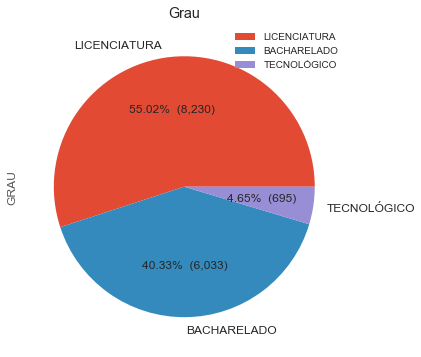

In [14]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

df['GRAU'].value_counts().plot(title='Grau', kind='pie', figsize=(6, 6), legend=True, fontsize=12, autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(df['GRAU'].value_counts())/100))